# Covariance matrix

> A serious attempt at all the assignments is mandatory to grant access to the final exam. Refer to the course manual for more details (section *Overview* on Brightspace). 

> Please add today's topic to your knowledge graph.

**Learning goals:**
- Refresh background knowledge of covariance matrices;
- Be able to compute covariance matrices;
- Understand the eigen decomposition of covariance matrices and how eigenvalues and eigenvectors relate to the underlying data distribution;
- Understand the limitations of estimating covariance matrices from empirical data;
- Understand the solutions to the limitations.

**Solutions file:**

For this assignment, a solutions file will be released after the deadline.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.covariance import shrunk_covariance

## Exercise 1: inspect 2D data
Below we provide a function `generate_data()` to generate data from a multivariate normal distribution given a mean and covariance matrix. 
1. Inspect how we create this data;
1. Visualize the data by plotting a scatter plot (`plt.scatter()`);
1. Visualize the data by plotting two histograms (`plt.hist()` in separate plots or using `plt.subplots()`);
1. Play around by changing the properties of the data (i.e., its mean and covariance). Inspect how the data change when changing the means, and inspect how the data change when changing the entries in the covariance matrix.
1. To brush up your knowledge about covariance matrices, you might want to watch [this](https://www.youtube.com/watch?v=G16c2ZODcg8) video. On the difference between covariance and correlation, [this](https://www.youtube.com/watch?v=KDw3hC2YNFc) is a good resource. 

In [2]:
def generate_data(N_samples=300, cov=[[2, 1], [1, 2]], mean=[0, 5]):
    X = np.random.multivariate_normal(mean, cov, N_samples)
    return X

In [56]:
np.random.seed(42) # ensures replicable results
X1 = generate_data()
# Answer here
print(X1.shape)
X2 = generate_data(mean = [1, 1])  # change mean
X3 = generate_data(cov=[[8,1], [1,1]])   # change variance

(300, 2)


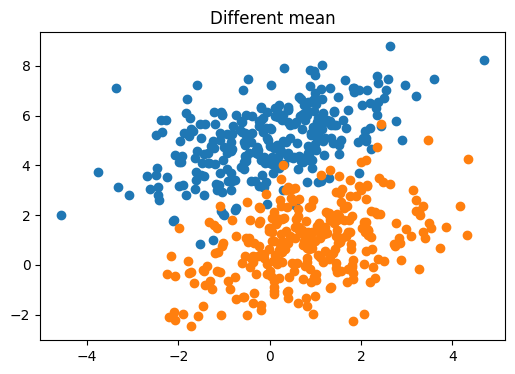

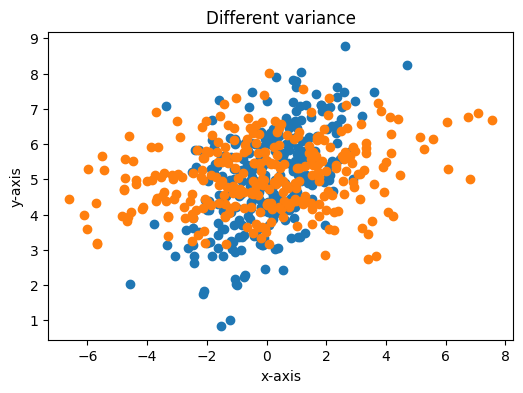

In [57]:
plt.figure(figsize=(6,4))
plt.scatter(X1[:, 0], X1[:, 1])
plt.scatter(X2[:, 0], X2[:, 1])
plt.title('Different mean')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(X1[:, 0], X1[:, 1])
plt.scatter(X3[:, 0], X3[:, 1])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title('Different variance')
plt.show()

C:\Users\ptrso\AppData\Local\Temp\ipykernel_9916\1573528982.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean, cov, N_samples)


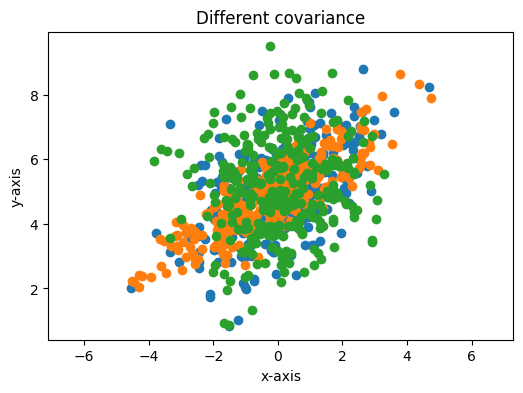

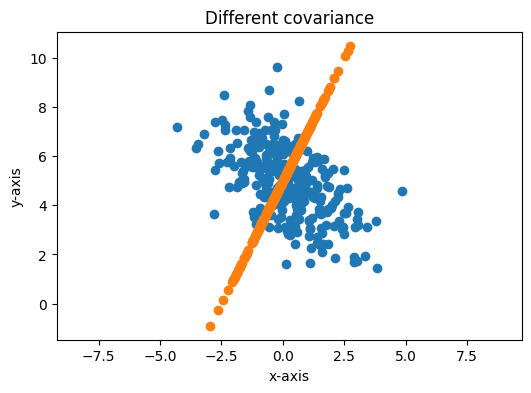

In [89]:
np.random.seed(42) # ensures replicable results
X1 = generate_data(cov=[[2, 1], [1, 2]])
X4 = generate_data(cov=[[2, 1], [3, 2]])
X0 = generate_data(cov=[[2, 0], [0, 2]])
# 
X1_ = generate_data(cov=[[2,-1], [-1,2]])
X4_ = generate_data(cov=[[2, 4], [1, 2]])

def plot_figure(*datasets):
    plt.figure(figsize=(6,4))
    for X in datasets:
        plt.scatter(X[:, 0], X[:, 1])
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.axis('equal')
    plt.title('Different covariance')

plot_figure(X1, X4, X0)
plot_figure(X1_, X4_)

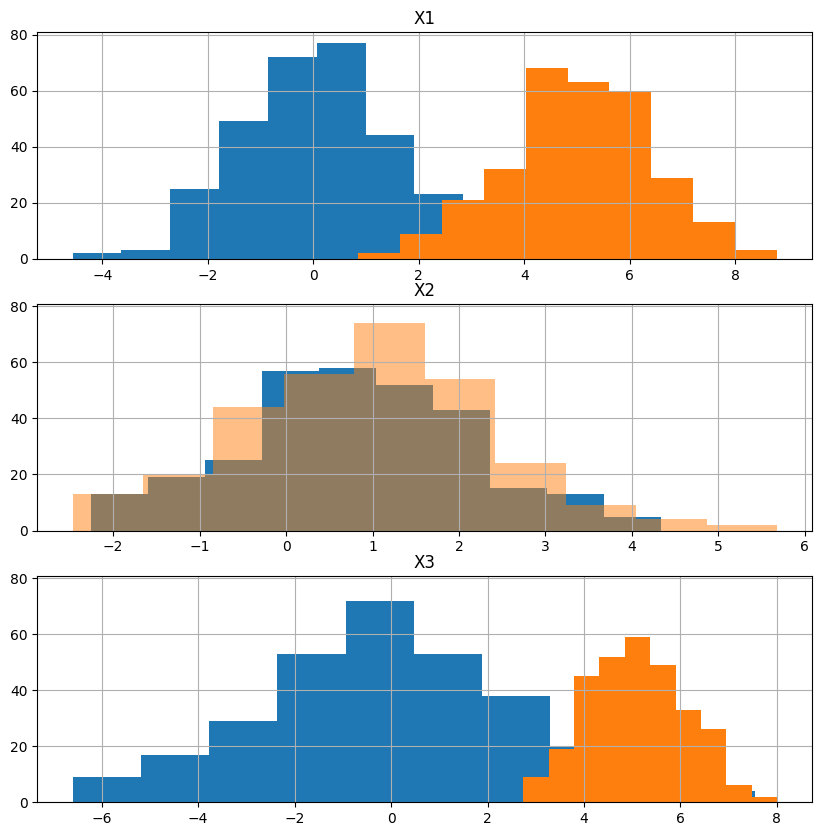

In [28]:
fig, (ax1, ax2, ax3)= plt.subplots(3, 1, sharey=True, figsize=(10,10))
ax1.hist(X1[:,0])
ax1.hist(X1[:,1])
ax1.set_title('X1')
ax1.grid()

ax2.hist(X2[:,0])
ax2.hist(X2[:,1], alpha=0.5)
ax2.set_title('X2')
ax2.grid()

ax3.hist(X3[:,0])
ax3.hist(X3[:,1])
ax3.set_title('X3')
ax3.grid()

## Exercise 2: covariance estimator for n-dimensional data
Below we provide a function `generate_covariance()` that samples a covariance matrix. Then, a resulting covariance matrix is fed to `generate_data()` to generate data.
1. Implement a function `estimate_covariance(X)` that calculates the covariance matrix for a given data set $X$ of size $(N_{samples} \times D_{features})$. You can test your function with the data set returned from the function `generate_data()`;
1. Compare your resulting covariance matrix with the corresponding built-in-function in the "Numpy" package (`np.cov()`) and the ground truth covariance. Please carefully check the documentation of the numpy function for the definition of the input;
1. Visualize the three covariance matrices e.g. with the function `plt.imshow()` from the "Matplotlib" package, using separate subplots with `plt.subplots()`. 

**Hint**: if you're running into trouble with the implementation of covariance estimation, inspect the shape of your output using `var.shape` and compare it with your expectations for a desired input of $N_{samples} \times  D_{features}$.

In [ ]:
def generate_covariance(D_features):  # "True" covariance
    tmp = np.random.randn(D_features, D_features)
    cov = np.dot(tmp, tmp.transpose())  # slide 21 equation for covariance matrix
    return cov

In [155]:
np.random.seed(42) # ensures replicable results
N_samples = 200
D_features = 100
cov_true = generate_covariance(D_features)
X = generate_data(N_samples, cov_true, np.zeros(D_features))  # mean 0 for all dimensions
print(X.shape)

(200, 100)


In [ ]:
''' 
No classes yet to loop over
Estimate with 200 samples. At infinity might converge to true
X input must have dimesions N_samples x D_features
'''
def estimate_covariance(X):  
    cov_arr = np.zeros([X.shape[1], X.shape[1]])
    # for i in range(X.shape[0]):
        # cov_arr[i] = X[i] - np.mean(X, axis=0)
    X_c = X - np.mean(X, axis=0)
    n = X.shape[0]  # number of samples from X matrix

    cov_est = np.dot(X_c.T, X_c) / (n - 1)  # first .T for D x D dimensionality
    return cov_est

cov_estimate = estimate_covariance(X)
print(cov_estimate.shape)

cov_est_numpy = np.cov(X, rowvar=False)  # Takes rows as features by default
print(cov_est_numpy.shape)

print("Are the two implementations the same?", np.allclose(cov_estimate,cov_est_numpy))

# print(np.allclose(cov_estimate, cov_true)) # Not identical since it is only an estimate
# print(cov_true)

(100, 100)
(100, 100)
Are the two implementations the same? True


Text(0.5, 1.0, 'Function')

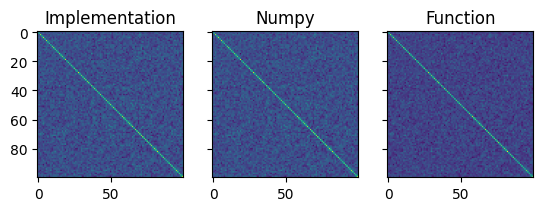

In [158]:
fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].imshow(cov_estimate)
axs[0].set_title("Implementation")
axs[1].imshow(cov_est_numpy)
axs[1].set_title("Numpy")
axs[2].imshow(cov_true)
axs[2].set_title("Function")

## (Optional) Exercise 3: eigenvectors of the covariance matrix
In this (optional) exercise, we want to shed light on the relationship between the eigenvalues / eigenvectors of the covariance matrix and the shape of the normal distribution in a 2D scenario. 
1. Visualize a randomly sampled normal distribution (e.g. by using the seaborn function `fig = sns.jointplot()`); 
1. Calculate eigenvalues and eigenvectors of the true covariance matrix using `np.linalg.eig()`;
1. Draw the estimated eigenvectors multiplied by the square root of the corresponding eigenvalues in the same plot. For this you could use seaborn's `annotate()` function; use something along the lines of this to add the arrows to your plot:
```python 
                fig.ax_joint.annotate('', xytext=(0, 0), xy=eigvects[:, i] * np.sqrt(eigvals[i]), arrowprops=dict(facecolor='red', width=2.0))
```
1. What do you observe regarding the size of the eigenvalues and the shape of the eigenvectors (i.e., refering to the covariance matrix)?
1. If the eigenvalues are over (or underestimated), what does this mean for the estimated shape of the normal distribution (i.e., its covraince matrix)?

In [ ]:
np.random.seed(3) # ensures replicable results
D_features = 2
N_samples = 500
cov_true = generate_covariance(D_features)
X = generate_data(N_samples, cov_true, np.zeros(D_features))

In [ ]:
# Answer here

## Exercise 4: eigenvalue spectrum for various sample sizes
For a fixed number of features $D_{features} = 100$, vary the number of samples $N_{samples}$ and implement the following steps:
 1. Estimate the covariance matrix from the generated samples X;
 2. Calculate the eigenvalues of the covariance matrix;
 3. Sort the eigenvalues in descending order;
 4. Plot the eigenvalues as a function of their order/rank (called eigenvalue spectrum).

This procedure should be repeated for the given sample sizes $N_{samples}=[20,50,100,300,1000]$ and all eigenvalue spectra shown in one figure. For comparison, repeat the steps (2)-(4) also for the true covariance matrix and add this eigenvalue spectrum to the created figure. 

1. What do you observe for the largest and smallest estimates of the eigenvalues?
1. What do you observe for an increasing number of N_samples?
1. Which condition for the N_samples in relation to D_features is necessary to allow an estimation of covariance?
1. How can you manipulate your data to avoid this problem, in the case of N_samples < D_features?

In [159]:
np.random.seed(42) # ensures replicable results
D_features = 100
N_samples = [20, 50, 100, 300, 1000]
cov_true = generate_covariance(D_features)

In [ ]:
# Answer here
descending_eigv_list = []

eigv_true = np.linalg.eigh(cov_true)[0]
descending_eigv_list.append(-np.sort(-eigv_true))

for N in N_samples:
    X = generate_data(N, cov_true, np.zeros(D_features))
    cov_est = estimate_covariance(X)
    eigv = np.linalg.eigh(cov_est)[0]
    # print(eigv.shape)
    # Trick to turn ascending to descending
    descending_eigv_list.append(-np.sort(-eigv))
    
print(descending_eigv_list[0][:10])



[388.05360049 378.25656139 347.1056081  330.85474677 325.08099523
 300.02507871 293.23818789 284.30856343 279.62719748 273.9812634 ]


['True', 'N=20', 'N=50', 'N=100', 'N=300', 'N=1000']


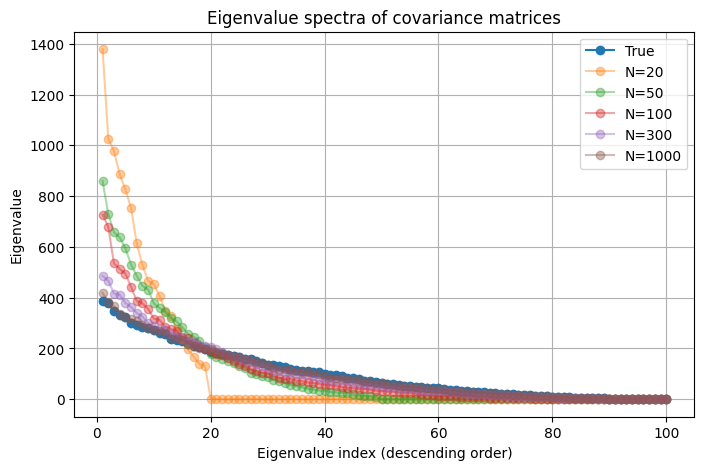

In [ ]:
# Plot per order/rank
labels = ["True"] + [f"N={N}" for N in N_samples]
print(labels)

plt.figure(figsize=(8,5))
for eigv, lbl in zip(descending_eigv_list, labels):
    a = 0.4
    if lbl == "True": a = 1
    plt.plot(range(1, len(eigv)+1), eigv, marker='o', label=lbl, alpha=a)

plt.xlabel("Eigenvalue index (descending order)")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalue spectra of covariance matrices")
plt.legend()
plt.grid()
plt.show()

## Answers to Questions

1. Largest estimates for a finite number of samples tend to overestimate their corresponding eigenvalues while the smallest estimates them or are even 0 if $N_{samples} \leq D_{features}$.

2. As $N_{samples}$ increase the estimates converge to the true value of the eignevalues and the over/under-estimation bias is diminished.

3. For there to be an estimate of covariance the number of samples $N_{samples}$ must be larger than the number of features $D_{features}$. And from the graph, a good estimation needs at least 5-10 times the amount of samples compared to features.

4. Reduce the dimensionality of the problem by using techniques like PCA or Feature selection and choosing top k < N directions/features working with the reduced variance. You can also apply regularization/shrinkage.

## Exercise 5 :  Improving covariance estimation by means of regularization
You may have observed a systematic error in the eigenvalue estimates, even for $N_{samples} > D_{features}$. Here we investigate a way to compensate for this systematic error such that the estimated spectrum approximates the true spectrum more closely. For that we use regularized estimation of the covariance matrix using a schrinkage parameter. 
1. Look-up what this shrinkage of the covariance matrix really means, what does it do? Read for instance the sklearn documentation of the function [here](https://scikit-learn.org/stable/modules/covariance.html#shrunk-covariance). We have also added an short summary below.

### Shrinkage regularization explained
Note: $N$ is used as the number of samples in a dataset and $D$ is the number of features.
#### Goal
The goal is to find a better estimate of the true covariance matrix. 

**Why**? With few samples and/or large dimensionality (especially when $N$ < $D$), large eigenvalues are overestimated and small eigenvalues are underestimated (see previous exercise). 

**How** do we combat this? Squeeze the 'pointy' estimated covariance matrix towards the (scaled) identity matrix (circle in 2D). The amount of regularization (amount of squeezing) is regulated with a scalar parameter $\gamma$ ∈ [0,1], where 0 is no regularization and 1 means just taking the (scaled) identity matrix. Intuition is shown in the figure below [1].

![Shrinkage regularization](data/shrinkage_regularization_covariance_matrix.jpg)

Figure: Left: Eigenvalue spectrum of a given covariance matrix (bold line) and eigenvalue spectra of covariance matrices estimated from a finite number of samples drawn ($N= 50,100, 200, 500$) from a corresponding Gaussian distribution. Middle: Data points drawn from a Gaussian distribution (gray dots; $D = 200$ dimensions, two dimensions selected for visualization) with true covariance matrix indicated by an orange colored ellipsoid, and estimated covariance matrix in
cyan. Right: An approximation of the true covariance matrix can be obtained as a linear interpolation between the empirical covariance matrix and a sphere of appropriate size [1].

##### Formula
$\begin{equation}
\mathbf{\tilde{\Sigma}}(\gamma):=(1-\gamma) \mathbf{\hat{\Sigma}}+\gamma \nu \mathbf{I}
\end{equation}$ 
Where, $\mathbf{\tilde{\Sigma}}$ ($D, D$) is the new regularized/shrunk covariance matrix of the data, $\gamma$ (scalar) (0 ≤ $\gamma$ ≤ 1) is
the shrinkage parameter, $\mathbf{\hat{\Sigma}}$ ($D, D$) is the estimated covariance matrix of the data, $\nu$ (scalar) is the average eigenvalue [trace](https://en.wikipedia.org/wiki/Trace_(linear_algebra)) of estimated/empirical covariance matrix $\mathbf{\hat{\Sigma}}$, and $\mathbf{I}$ is the identity matrix.

[1] *Blankertz, B., Lemm, S., Treder, M., Haufe, S., & Müller, K. R. (2011). Single-trial analysis and classification of ERP components—a tutorial. NeuroImage, 56(2), 814-825*.

### Exercises
To work with shrinkage regularization we can use the `shrunk_covariance()` function from the "sklearn" library. We have implemented a function below that uses that function. Your task now is to:

2. Estimate the empirical covariance matrix with and without regularization;
3. For the *true*, the *empirical*, and the *regularized* covariance matrices, compute the eigenvalue spectrum;
4. Plot the eigenvalue spectrums in a single figure;
5. Compute the mean squared error between the true and empirical, and the true and regularized covariance matrix (e.g., by means of the eigenvalue spectrum);
6. Report your observations.

In [217]:
def estimate_regularized_covariance(X, shrink_param=0.3):
    cov = np.cov(X.T)
    regularized_cov = shrunk_covariance(cov, shrink_param)
    return regularized_cov

In [ ]:
np.random.seed(42) # ensures replicable results
N_samples = 120
D_features = 100
cov_true = generate_covariance(D_features)
X = generate_data(N_samples, cov_true, np.zeros(D_features))

Mean-squared error between true and empirical covariance matrix:
 1727.6480025415203 
Mse between true and regularized covariance matrix::
 448.7024224245864


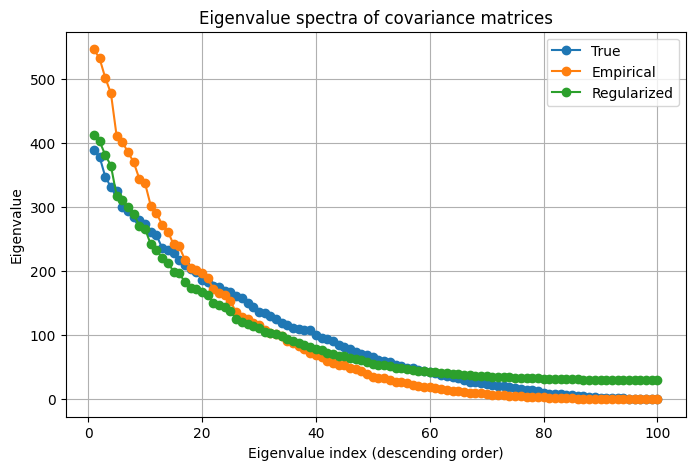

In [229]:
# Answer here
emp_cov_est = estimate_regularized_covariance(X, shrink_param=0)
reg_cov_est = estimate_regularized_covariance(X)

estimates = [cov_true, emp_cov_est, reg_cov_est]
est_eigv_list = []

for est in estimates:
    emp_eigv = np.linalg.eigh(est)[0]
    est_eigv_list.append(-np.sort(-emp_eigv))  # descending order


# est_eigv_list has 3 lists, each one of 100 eigenvalues for each method
# print(len(est_eigv_list[0]))

# Means
# true_mean = np.mean(est_eigv_list[0])
# emp_mean = np.mean(est_eigv_list[1])
# reg_mean = np.mean(est_eigv_list[2])
# print("True, Empirical and Regularized means:\n", true_mean, emp_mean, reg_mean)

def mse_calculation(est_eigvals, true_eigvals):  
    # both arrays (D x D) should be same length and already sorted
    diff = est_eigvals - true_eigvals
    # print(mean)
    mse = np.mean(diff**2)
    return mse

mse_true_emp = mse_calculation(est_eigv_list[0], est_eigv_list[1])
mse_true_reg = mse_calculation(est_eigv_list[0], est_eigv_list[2])

print("Mean-squared error between true and empirical covariance matrix:\n", mse_true_emp, 
      "\nMse between true and regularized covariance matrix::\n", mse_true_reg)

# Plot eigenspectrum
labels = ["True", "Empirical", "Regularized"]

plt.figure(figsize=(8, 5))
for eigv, lbl in zip(est_eigv_list, labels):
    plt.plot(range(1, len(eigv)+1), eigv, marker='o', label=lbl)

plt.xlabel("Eigenvalue index (descending order)")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalue spectra of covariance matrices")
plt.legend()
plt.grid()
plt.show()

## 6. Observations
The empirical covariance overestimates large eigenvalues and underestimates small ones. Regularization shrinks the eigenvalue spectrum toward the mean, reducing this bias. As seen both visually and from the MSE values, the regularized covariance has a much smaller MSE and a better approximation of the covariance matrix.

## Exercise 0: Who did what?
Please provide a short description on who contributed what to your submission.

> Petros Christodoulou s1147889 Ex. 1, 2, 4, 5